<a href="https://colab.research.google.com/github/dkhanna511/Pytorch_tutorials_Revision/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [24]:
## Create a model class that inherits the nn.Module


class Model(nn.Module):   ## Model inherits nn.Module
    ## input layer ( 4 features of the flower) -->
    # Hidden layer1 (no.of neurons) -->
    # H2(no. of neurons) -->
    # output ( 3 classes of Irir flower)

    def __init__(self, in_features = 4, h1= 8, h2 = 9, out_features = 3):
        super().__init__()   ## This will instantiate out nn.Module
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    ## Function that moves everything forward ( FORWARD PROPAGATION)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x





In [25]:
## Pick a manual seed for randomization -- this basically gives similar outputs if different people are training the model with same seed
torch.manual_seed(32)

model = Model()



In [26]:
import matplotlib_inline
%matplotlib inline
import pandas as pd

In [27]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
my_df = pd.read_csv(url) ### We're using the IRIS Dataset. We cna get it from the url directly
my_df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
## Change last column from strings to integers

my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [29]:
## Train, test, and split the data
X = my_df.drop('species', axis = 1)
y = my_df['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
## Convert X and y to numoy arrays

X = X.values
y = y.values

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
## Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [33]:
#Convert X features to float tensors

X_train = torch.FloatTensor(X_train)
# print(X_train)
X_test =  torch.FloatTensor(X_test)

In [34]:
## Convert y tensors to tensor long
y_train = torch.LongTensor(y_train)     ## long tensors are 64 bit integers
y_test = torch.LongTensor(y_test)

In [35]:
## Set the criterion of our model to measure the error to see how far off the predictions are from our targets

criterion = nn.CrossEntropyLoss()

##Choose Adam optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [36]:
## Checking the parameters
model.parameters()

<generator object Module.parameters at 0x78dea3237300>

## Training model

In [37]:
## Train our model
## epochs? ( one run through all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
    ## Go forwards and get a prediction
    y_pred = model.forward(X_train) ## Get predicted results
    # print(" y pred : ", y_pred)
    ## Measure the loss/error, gonne be high at first
    loss = criterion(y_pred, y_train)

    ## Keep track of our losses
    losses.append(loss.detach().numpy())

    ## Print every 10 epochs
    if i %10 ==0:
        print(" Epoch : {}, loss : {}".format(i, loss))


    ## Do some back propagation: Take the error rate of forward propagation and feed it back to the network to fine tune the weights

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



 Epoch : 0, loss : 1.1642626523971558
 Epoch : 10, loss : 0.9502732157707214
 Epoch : 20, loss : 0.7863701581954956
 Epoch : 30, loss : 0.6350343227386475
 Epoch : 40, loss : 0.4286562204360962
 Epoch : 50, loss : 0.2817978858947754
 Epoch : 60, loss : 0.170501247048378
 Epoch : 70, loss : 0.10465356707572937
 Epoch : 80, loss : 0.0738060399889946
 Epoch : 90, loss : 0.05845501646399498


Text(0.5, 0, 'epochs')

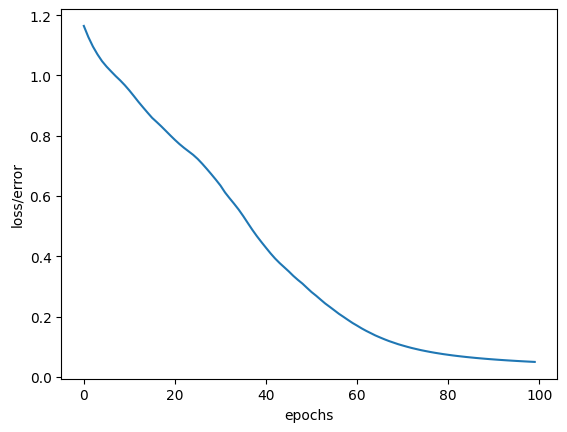

In [38]:
## Graph it out!
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")


# Validating the model

In [39]:
## Evaluate the model on test Data set (validate on test set)

with torch.no_grad(): ## Basically turn off back propagation
    y_eval = model.forward(X_test) #X_test are features from test set, y_eval will be predictions
    loss = criterion(y_eval, y_test) ## Find the loss or error
    # print(loss)



In [40]:
loss

tensor(0.1240)

In [41]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print("{}, {} , {} {} ".format(i+1, str(y_val), y_test[i], y_val.argmax().item())) ## Checking which one is correct and which one isn't

        ## Correct or not?
        if y_val.argmax().item() ==  y_test[i]:
            correct+=1
    print(" correct outputs are : {}".format(correct))


1, tensor([-7.2038,  2.1721,  5.4994]) , 2 2 
2, tensor([-9.1732,  1.3745,  7.8775]) , 2 2 
3, tensor([-10.1985,   1.7705,   8.6772]) , 2 2 
4, tensor([-3.0827,  4.1812, -0.1920]) , 1 1 
5, tensor([-8.3784,  2.0315,  6.6663]) , 2 2 
6, tensor([-1.5283,  4.3402, -1.9532]) , 1 1 
7, tensor([-6.5455,  2.5353,  4.4948]) , 2 2 
8, tensor([-2.5963,  4.2664, -0.8098]) , 1 1 
9, tensor([-7.2847,  2.3287,  5.3471]) , 2 2 
10, tensor([-9.6250,  1.4546,  8.2592]) , 2 2 
11, tensor([-5.8126,  2.7934,  3.5324]) , 2 2 
12, tensor([  7.1656,   1.4196, -11.7688]) , 0 0 
13, tensor([  6.4275,   1.2548, -10.5445]) , 0 0 
14, tensor([-0.5550,  3.7271, -2.5152]) , 1 1 
15, tensor([  6.1486,   1.6963, -10.5360]) , 0 0 
16, tensor([-5.4478,  3.2660,  2.8794]) , 2 1 
17, tensor([  6.4697,   1.4848, -10.8310]) , 0 0 
18, tensor([-6.4601,  2.5550,  4.4103]) , 1 2 
19, tensor([  7.6222,   1.2384, -12.2484]) , 0 0 
20, tensor([ 5.2052,  1.5668, -9.0109]) , 0 0 
21, tensor([-0.9924,  4.0699, -2.2869]) , 1 1 
22, 

## Feed new data into neural network to make predictions

In [42]:
new_iris = torch.Tensor([4.7, 3.2, 1.3, 0.2])

In [43]:
with torch.no_grad():
    print(model(new_iris)) ## This will give us a prediction tensor -- we have to get an argmax to get the actual prediction

tensor([  6.8775,   1.2704, -11.2076])


In [44]:
newer_iris= torch.Tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
    print(model(newer_iris))
    print("tensor argmax is : {}".format(model(newer_iris).argmax()))

tensor([-6.5677,  2.3802,  4.5920])
tensor argmax is : 2


0.9999150000000001

## SAVE AND LOAD OUR MODEL WITH PYTORCH

In [48]:
## Save our NN model

torch.save(model.state_dict(), 'my_really_small_simple_iris_model.pt')


In [51]:
new_model_loaded = Model()
new_model_loaded.load_state_dict(torch.load('my_really_small_simple_iris_model.pt'))

<All keys matched successfully>

In [52]:
new_model_loaded.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)